In [85]:
%matplotlib notebook
# Calculation of a magnetic field of a wire
# later I want to to it three dimensional
#https://stackoverflow.com/questions/4969704/python-calculate-the-magnetic-field-of-a-wire-using-biot-savart-law
# Other options:
# https://github.com/grungy/staticbs
#https://someusefulcode.wordpress.com/2012/05/07/a-simple-biot-savart-solver-in-python/

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pylab import *
from scipy import constants # Constantes Físicas
#constants.mu_0/(4*np.pi)

In [149]:
# current
I = 10
#mu0 = 1e-7 ##??
constant = constants.mu_0/(4*np.pi)# mu0/(4*np.pi) 

a=0.454
b=0.089
DLi=0.01 # integral 'unit' length
# wire position
coord = [(a,b), (-a,b), (-a,-b), (a,-b), (a,b)]
coord2 = []

# devide path of the wire in parts of length DLi
parts = 0
for n in range(len(coord)-1):
    lengthx = coord[n+1][0] - coord[n][0]
    lengthy = coord[n+1][1] - coord[n][1]
    length = np.sqrt(lengthx**2 + lengthy**2) / DLi
    for m in range(int(length)):
        coord2.append((coord[n][0]+lengthx/length*m, coord[n][1]+lengthy/length*m))
        parts += 1

# calculate the b-field, return vector
def bfield(x,y,z):
    b = np.zeros((1,3))
    for i in range(parts-1):
        dlx = coord2[i+1][0]-coord2[i][0]
        dly = coord2[i+1][1]-coord2[i][1] 
        dlz = 0
        dl = np.array([dlx,dly,dlz])
        rspace_minus_rwire_x = x - (coord2[i][0]+dlx)
        rspace_minus_rwire_y = y - (coord2[i][1]+dly)
        rspace_minus_rwire_z = z - 0
        rspace_minus_rwire = np.array([rspace_minus_rwire_x, rspace_minus_rwire_y, rspace_minus_rwire_z])
        absr = (rspace_minus_rwire_x**2 + rspace_minus_rwire_y**2 + rspace_minus_rwire_z**2)**0.5
        a = constant * I * np.cross(dl, rspace_minus_rwire) / absr**3
        b += a #(a[0]**2 + a[1]**2 + a[2]**2)**0.5
    return b

xpoints=26
ypoints=26
xwidth = 1.0
ywidth = 0.4
z = 0.01
bmatrix = np.zeros((xpoints,ypoints))
for i in range(xpoints):
    for j in range(ypoints):
        vect=bfield((i*xwidth)/xpoints,(j*ywidth)/ypoints,z)
        bmatrix[i][j] = np.linalg.norm(vect)

#bmatrix[3][2]

<IPython.core.display.Javascript object>


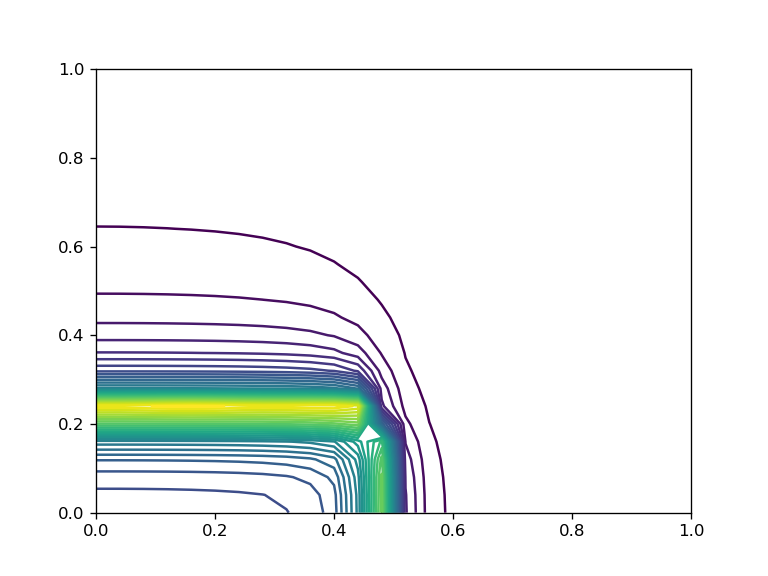

In [152]:
# visualize
plt.figure()
z = bmatrix.T
x = np.linspace(0.0, xwidth, xpoints)# (range(xpoints)*xwidth)/xpoints
y = np.linspace(0.0, xwidth, xpoints)#(range(ypoints)*ywidth)/ypoints
#x = xrange(xpoints)
#y = range(ypoints)
#z = bmatrix[x][y].T
#z.shape

contour(x,y,z,35)
plt.show()

In [197]:
#Phi=89/180.0*np.pi
Phi=np.radians(45)
Npoints=10
pointsL=np.linspace(0,5*a, Npoints)
bmatrix = np.zeros((xpoints,ypoints))
#pointsXZ=np.array([pointsL * np.cos(Phi), pointsL * np.sin(Phi)])
#range(len(pointsL))
#pointsL

In [198]:
Bprobe= np.zeros((Npoints, 1, 3))
Bmag= np.zeros((Npoints, 1))
for i in range(Npoints):
        Bprobe[i]=bfield(pointsL[i] * np.cos(Phi), 0.0, pointsL[i] * np.cos(Phi))
        Bmag[i]= np.linalg.norm(Bprobe[i])   
        
#       bmatrix[x][y] = np.linalg.norm(vect)
#       bmatrix[x][y] = np.linalg.norm(vect)
 #      pointsXZ

In [199]:
c, s = np.cos(theta), np.sin(Phi)
rot_matrix=np.array([[c, 0, -s],
                     [0, 0, 0],
                     [s, 0, c]])
Brot  = np.zeros(( Npoints, 1, 3))
for i in range(Npoints):
    Brot[i]=np.matmul(Bprobe[i], rot_matrix )
Bprobe.shape

(10L, 1L, 3L)

<IPython.core.display.Javascript object>


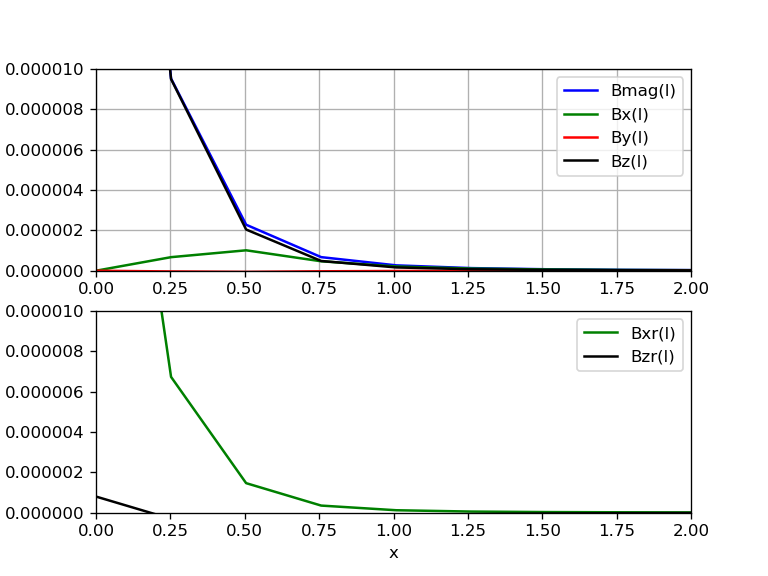

In [203]:
fig = plt.figure()
ax1 = fig.add_subplot(211 , autoscale_on=False, xlim=(0, 2), ylim=(0, 1e-5))
ax2 = fig.add_subplot(212 , autoscale_on=False, xlim=(0, 2), ylim=(0, 1e-5)) #, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))

#ax1.plot(theta, y,label='Emitido-CH1')
ax1.plot(pointsL, Bmag, 'b', label='Bmag(l)')
ax1.plot(pointsL, Bprobe[:,:,0], 'g', label='Bx(l)')
ax1.plot(pointsL, Bprobe[:,:,1], '-r', label='By(l)')
ax1.plot(pointsL, Bprobe[:,:,2], 'k', label='Bz(l)')
ax1.grid()
ax2.set_xlabel('x')
ax1.legend(loc='best')
ax2.plot(pointsL, Brot[:,:,0], 'g', label='Bxr(l)')
ax2.plot(pointsL, Brot[:,:,2], 'k', label='Bzr(l)')
ax2.legend(loc='best')
fig.show()

In [169]:
c, s = np.cos(theta), np.sin(Phi)

In [170]:
rot_matrix=np.array([[c, 0, -s],
                     [0, 0, 0],
                     [s, 0, c]])

In [171]:
Bprobe[0].shape

(1L, 3L)

In [172]:
np.matmul(Bprobe[0], rot_matrix )

array([[  4.57077550e-05,   0.00000000e+00,   7.97831831e-07]])